# Data exploration

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nlp_module import normalize_corpus, remove_stopwords
from wordcloud import WordCloud, STOPWORDS
import gc

In [2]:
data = pd.read_csv("datasets\combined_csv.csv",
                   dtype="object",
                   low_memory=False)
data.head(1)

,Id,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,AnswerCount,CommentCount
0,415160,NaN,2009-01-06 02:00:17,7,6374,<p>What is the best method for creating an <a ...,51886.0,Best method of Instantiating an XMLHttpRequest...,<javascript><ajax><cross-browser><xmlhttprequest>,9,1


In [3]:
data.shape

(2568165, 11)

Data exploration will be divided in two parts. 

The first part is about numeric data. In this step, we will cleaning numerical data as comment, view and answer counter and score. These features will help us to select the most confidence posts.

The second part is about text data. Textual data are unstructured data that need a specific processing. We will create a dataset with only textual data. In this dataset, we will performn all stage that are necessary to cleaning data. Textual data need to be transformed on numeric data before to use it in Machine Learning algorithms. Thus, we will use numerous functions. These functions will be remove HTML tags around title and body text ; removed accentued characters (if needed) ; expanded contractions forms (typically found in English language) ; removed special characters, lemmatized text and remove stopwords. 

## I - Numeric data processing

### 1) Dealing with missing values and duplicated data

First, missing data will be observed.

In [4]:
print((data.isnull().mean()\
       *100).round(2))

Id                   0.00
AcceptedAnswerId    43.42
CreationDate         0.00
Score                0.00
ViewCount            0.00
Body                 0.00
OwnerUserId          2.20
Title                0.00
Tags                 0.00
AnswerCount          0.00
CommentCount         0.00
dtype: float64


We can see that almost the half of the post have no accepted answer.

In [5]:
data.drop_duplicates(subset="Id", 
                     inplace=True)

Id were analysed in order to find duplicate posts. This duplicated posts will be removed. 

Finally, data type will be changed. CreationDate become a datetime and the others numerical variables such as Score, ViewCount or AnswerCount were transformed in int data. 

In [6]:
data["CreationDate"] = pd.to_datetime(data["CreationDate"],
                                     format="%Y-%m-%d", 
                                     errors="ignore")
data["Score"] = data["Score"].astype("int32")
data["ViewCount"] = data["ViewCount"].astype("int32")
data["AnswerCount"] = data["AnswerCount"].astype("int32")
data["CommentCount"] = data["CommentCount"].astype("int32")

### 2) Determine characterics of a good question

We make the assumption that posts without "AcceptedAnswerId" are bad posts. We delete these posts of our sample. 

In [7]:
data.dropna(subset=["AcceptedAnswerId"],
            inplace=True)
data.shape

(1438314, 11)

In [8]:
data.describe()

,Score,ViewCount,AnswerCount,CommentCount
count,1.438314e+06,1.438314e+06,1.438314e+06,1.438314e+06
mean,3.656626e+00,3.860701e+03,1.907445e+00,3.200809e+00
std,5.173774e+01,3.892935e+04,1.844153e+00,2.682042e+00
min,-2.500000e+01,5.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.800000e+01,1.000000e+00,1.000000e+00
50%,0.000000e+00,1.680000e+02,1.000000e+00,2.000000e+00
75%,2.000000e+00,9.220000e+02,2.000000e+00,4.000000e+00
max,2.577800e+04,9.830871e+06,1.290000e+02,6.800000e+01


As we can see, some posts have only one answer or one comment. We make choice to keep only posts with two comments or more. We made the same with the "AnswerCount". 

In [9]:
data = data.loc[data["CommentCount"] >= 2]
data = data.loc[data["AnswerCount"] >= 2]
data = data.loc[data["Score"] >= 2]
data.shape

(164598, 11)

Finally, we have 164.598 posts in our sample.

### 3) Univariate analysis

#### a) Description synthesis

In [10]:
data.describe()

,Score,ViewCount,AnswerCount,CommentCount
count,164598.000000,1.645980e+05,164598.000000,164598.000000
mean,20.880059,1.998435e+04,3.948456,4.139115
std,142.902179,1.014772e+05,3.664750,2.870641
min,2.000000,1.600000e+01,2.000000,2.000000
25%,2.000000,4.430000e+02,2.000000,2.000000
50%,4.000000,2.317000e+03,3.000000,3.000000
75%,9.000000,9.310750e+03,4.000000,5.000000
max,25778.000000,9.830871e+06,129.000000,62.000000


#### b) Graphical analysis

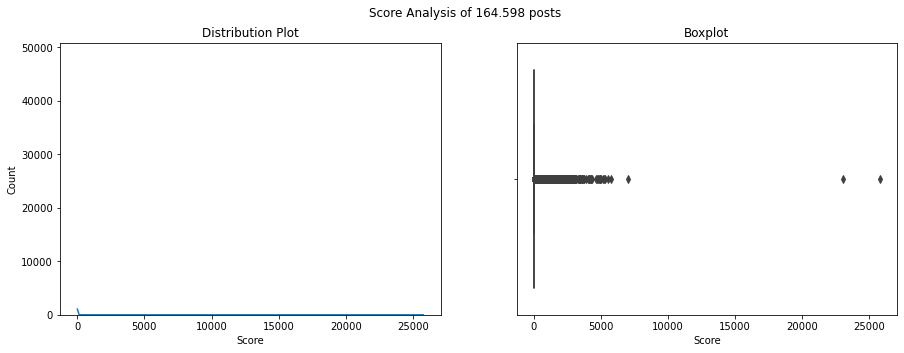

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Score Analysis of 164.598 posts')

sns.histplot(ax=axes[0], x="Score", data=data, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="Score", data=data)
axes[1].set_title("Boxplot")

plt.show()

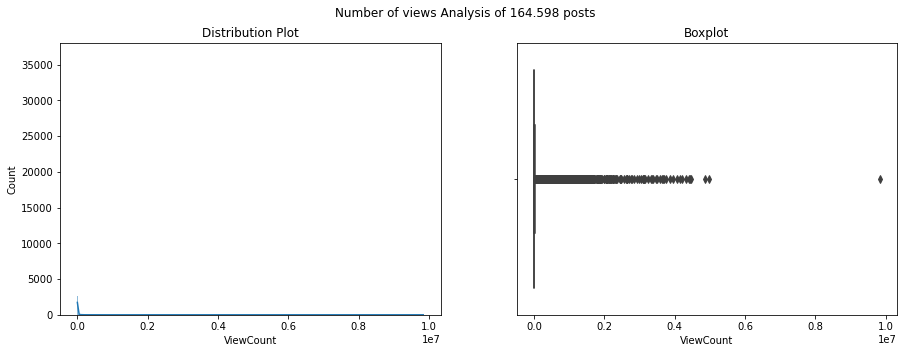

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Number of views Analysis of 164.598 posts')

sns.histplot(ax=axes[0], x="ViewCount", data=data, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="ViewCount", data=data)
axes[1].set_title("Boxplot")

plt.show()

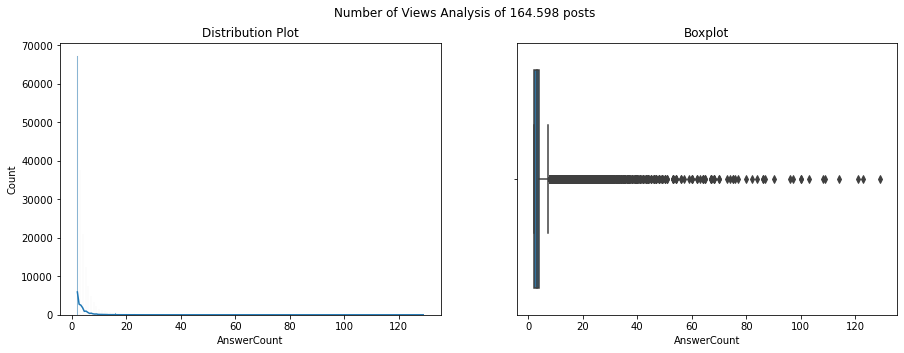

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Number of Views Analysis of 164.598 posts')

sns.histplot(ax=axes[0], x="AnswerCount", data=data, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="AnswerCount", data=data)
axes[1].set_title("Boxplot")

plt.show()

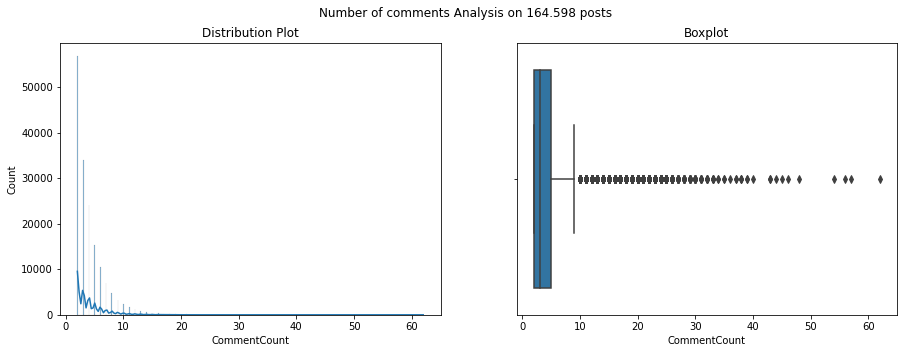

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Number of comments Analysis on 164.598 posts')

sns.histplot(ax=axes[0], x="CommentCount", data=data, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="CommentCount", data=data)
axes[1].set_title("Boxplot")

plt.show()

### 4) Bivariate analysis

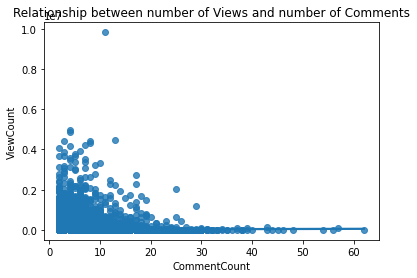

In [15]:
sns.regplot(x="CommentCount",
            y="ViewCount",
            data=data)
plt.title("Relationship between number of Views and number of Comments")
plt.show()

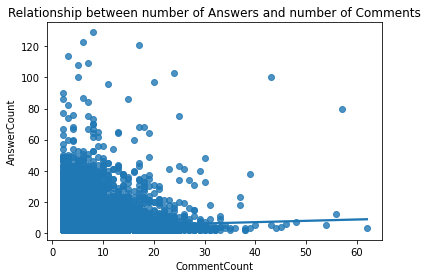

In [16]:
sns.regplot(x="CommentCount",
            y="AnswerCount",
            data=data)
plt.title("Relationship between number of Answers and number of Comments")
plt.show()

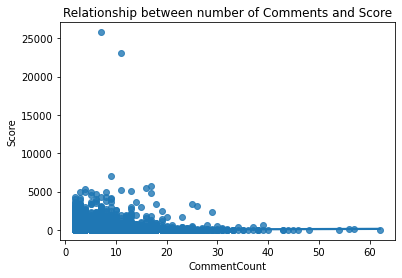

In [17]:
sns.regplot(x="CommentCount",
            y="Score",
            data=data)
plt.title("Relationship between number of Comments and Score")
plt.show()

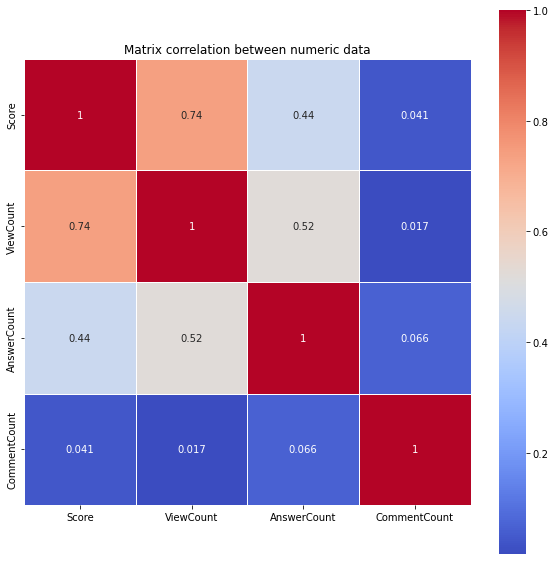

In [18]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, 
            cmap="coolwarm",
            annot=True,
            square=True,
            fmt=".2g",
            linewidths=.5)
plt.title("Matrix correlation between numeric data")
plt.show()

We can see a strength correlation between Score and number of Views. The more a post is viewed, the more is evaluated.

**Conclusion :**

In this case, statistical analysis was only a tool to select the best posts of our sample. In the beginning, more than 1.5 millions posts were downloaded but only 164.598 were selected. Posts without accepted answers, bad scores or with a few comments/views were eliminated. Indeed, assumption was made that posts without accepted answer, bad scores or few comments/views are posts with misleading tags.

## II - Textual data

The second stage of the exploration is about text data. Text data are unstructured data. Before using them in algorithms, they need a long preprocessing. Numerous steps compose this processing:
- tidying html tags,
- expanding contractions forms,
- cleansing accentued characters,
- changing text from upper case to lower case,
- lemmatizing,
- removing special characters,
- removing stopwords,
- removing numbers.

*Stemmatizing and Lemmatizing*

In Natural Processing Language, two mechanisms can be found : stemmatisation and lemmatisation.

**Stemming** "refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes". While **lemming** "refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the *lemma*".

*Definition from stanford.edu. Link in the end of this notebook*

Here, choice was made to perform a lemmatisation. Indeed, with this method, meaning of the words is conserved. 

In order to automatise the processing, a module was created. The script was saved in "nlp_module.py" and imported in the beginning of this notebook.

### 1) Processing text data

A new dataframe with only text data was created. Only title & body were preprocessing with the help of our functions. 

In [19]:
data_posts = pd.DataFrame()
data_posts["Id"] = data["Id"]
data_posts["Title"] = normalize_corpus(data["Title"])

In [ ]:
data_posts["Body"] = normalize_corpus(data["Body"])

In [ ]:
data_posts["Tags"] = data["Tags"]

In [ ]:
data_posts.head(3)

In [ ]:
data_posts.to_csv("datasets/posts_clean.csv",
                  index=False)

In [ ]:
del data
del data_posts
gc.collect()

### 2) Descriptive analysis

Once processing was realised, descriptive analysis can perform. 

In [140]:
posts = pd.read_csv("datasets/posts_clean.csv")
posts.head()

,Id,Title,Body,Tags
0,415192,good way create simple python web service,I use python year I little experience python w...,<python><web-services>
1,415344,log implementation prefer,I implement log class c try decide I curious k...,<debugging><language-agnostic><logging>
2,414981,directly modify list element,I struct struct map public int size public map...,<c#><.net>
3,415580,regex name group java,understanding java regex package not support n...,<java><regex>
4,415753,instance cache objective c,I want cache instance certain class class keep...,<objective-c><weak-references>


In [141]:
# Correction transform not saved
posts["Body"] = posts["Body"].str.lower()
posts["Body"] = posts["Body"].apply(remove_stopwords)

In [142]:
# Processing tags
posts["Tags"] = posts["Tags"].replace({"<" : ""}, regex=True)
posts["Tags"] = posts["Tags"].replace({">" : ","}, regex=True)
posts["Tags"] = posts["Tags"].str.rstrip(',')

In [143]:
posts.head()

,Id,Title,Body,Tags
0,415192,good way create simple python web service,use python year little experience python web p...,"python,web-services"
1,415344,log implementation prefer,implement log class c try decide curious know ...,"debugging,language-agnostic,logging"
2,414981,directly modify list element,struct struct map public int size public map i...,"c#,.net"
3,415580,regex name group java,understanding java regex package not support n...,"java,regex"
4,415753,instance cache objective c,want cache instance certain class class keep d...,"objective-c,weak-references"


In [144]:
posts.isnull().mean()
posts.dropna(axis=0,
             inplace=True)

In [145]:
posts.shape

(164588, 4)

Before performing some visualisation, some transformations were realised on text data. Bag-of-Words and Tfidf were performed. 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### a) Title visualisation

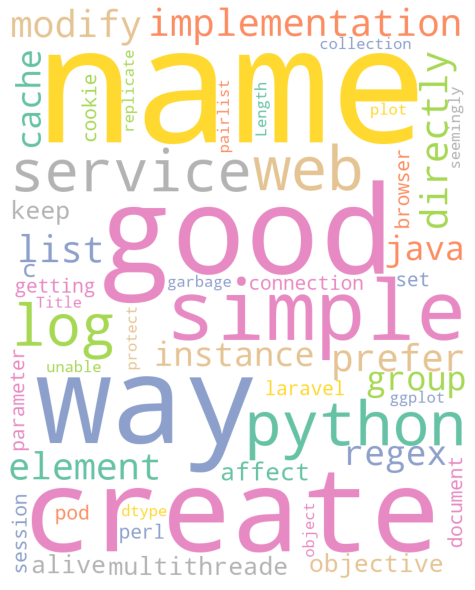

In [10]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(posts["Title"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
vectorizer = CountVectorizer(max_features=1000)
bow_title = vectorizer.fit_transform(posts["Title"]).toarray()
df_title = pd.DataFrame(bow_title, columns=vectorizer.get_feature_names())
df_title = pd.DataFrame(df_title.sum(), columns=["Value"])
df_title.head()

,Value
able,198
absolute,166
abstract,270
accept,241
access,1860


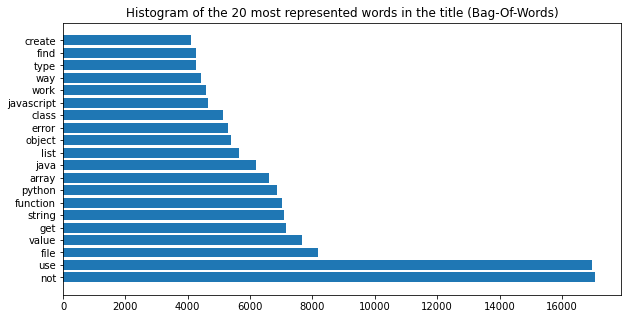

In [13]:
top_20_title_word = df_title.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word.index, width=top_20_title_word.Value)
plt.title("Histogram of the 20 most represented words in the title (Bag-Of-Words)")
plt.show()

In [14]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_title = vectorizer_tf.fit_transform(posts['Title']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])

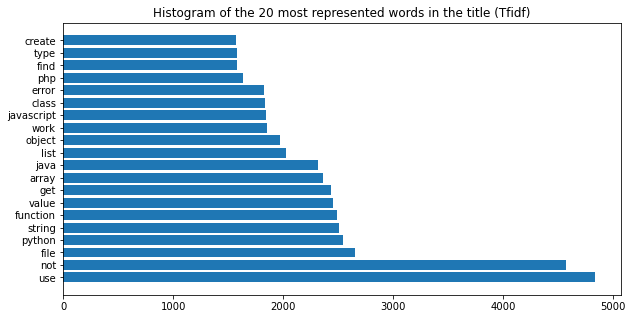

In [15]:
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogram of the 20 most represented words in the title (Tfidf)")
plt.show()

Inside titles, some words seem to give indications concerning the contents of body. Among the most represented words "Python", "Javascript" and "PHP" or "Java" refer to programing language. The evolution of the representation depends on the mainstream technology. 

#### b) Body visualisation

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(posts["Body"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
vectorizer = CountVectorizer(max_features=1000)
bow_body = vectorizer.fit_transform(posts["Body"]).toarray()
df_body = pd.DataFrame(bow_body, columns=vectorizer.get_feature_names())
df_body = pd.DataFrame(df_body.sum(), columns=["Value"])
df_body.head()

In [ ]:
top_20_body_word = df_body.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_body_word.index, width=top_20_body_word.Value)
plt.title("Histogram of the 20 most represented words in the body (Bag-Of-Words)")
plt.show()

In [ ]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_body = vectorizer_tf.fit_transform(posts['Body']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_body_tf = pd.DataFrame(tfidf_body, columns=feature_names)
df_body_tf = pd.DataFrame(df_body_tf.sum(), columns=["Value"])

In [ ]:
top_20_body_word_tf = df_body_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_body_word_tf.index, width=top_20_body_word_tf.Value)
plt.title("Histogram of the 20 most represented words in the body (TfIdf)")
plt.show()

Concerning the body of the posts, except "Python" and "Javascript", the most represented words are related to keywords in link with programming language. For instance, "try" or "return" are keywords of Python language.
It can be interesting to realise a Part of Speech analysis about body. However, keywords such as "get" or "like" can be identified as verbs. 

#### c) Tags visualisation

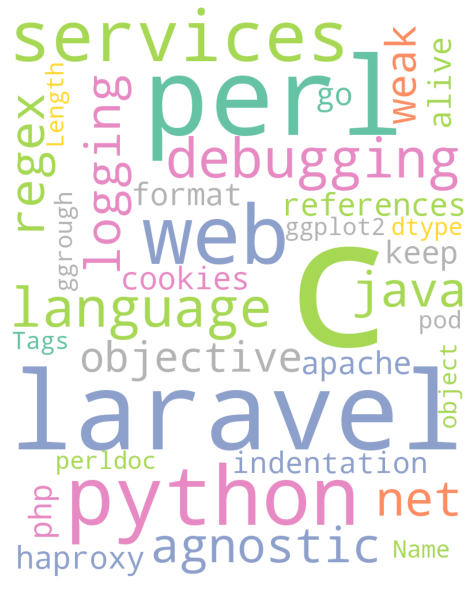

In [66]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(posts["Tags"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [67]:
vectorizer = CountVectorizer(max_features=1000)
bow_tags = vectorizer.fit_transform(posts["Tags"]).toarray()
df_tags = pd.DataFrame(bow_tags, columns=vectorizer.get_feature_names())
df_tags = pd.DataFrame(df_tags.sum(), columns=["Value"])

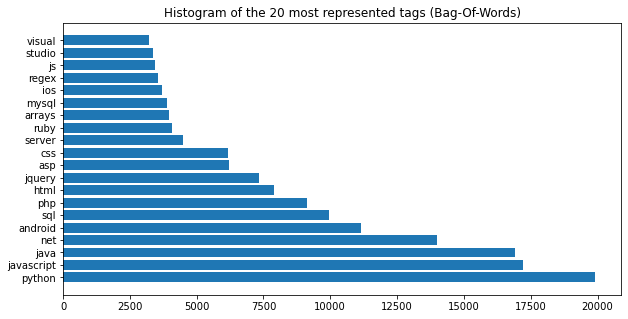

In [68]:
top_20_tags_word = df_tags.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_tags_word.index, width=top_20_tags_word.Value)
plt.title("Histogram of the 20 most represented tags (Bag-Of-Words)")
plt.show()

In [69]:
tags_more_frequent = df_tags.loc[df_tags["Value"] >= 250].sort_values("Value", ascending=False).index.tolist()

In [ ]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_tags = vectorizer_tf.fit_transform(posts['Tags']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_tags_tf = pd.DataFrame(tfidf_tags, columns=feature_names)
df_tags_tf = pd.DataFrame(df_tags_tf.sum(), columns=["Value"])

In [ ]:
top_20_tags_word_tf = df_tags_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_tags_word_tf.index, width=top_20_tags_word_tf.Value)
plt.title("Histogram of the 20 most represented tags (Tfidf)")
plt.show()

Language programming such as Python, Javascript (abbreviate js), HTML, PHP or Ruby are the most represented tags. This result is in accordance with the most represented words in the title of posts. 

 ### Posts selection

In order to obtain the best categorisation, tags with a frequency on 250 and more have been keept. 

In [93]:
print(tags_more_frequent)

['python', 'javascript', 'java', 'net', 'android', 'sql', 'php', 'html', 'jquery', 'asp', 'css', 'server', 'ruby', 'arrays', 'mysql', 'ios', 'regex', 'js', 'studio', 'visual', 'google', 'string', 'algorithm', 'windows', 'spring', 'reactjs', 'mvc', 'django', 'angular', 'rails', 'on', 'pandas', 'linux', 'performance', 'web', 'data', 'json', 'database', 'list', 'git', 'objective', 'node', 'core', 'iphone', 'memory', 'swift', 'file', 'multithreading', 'laravel', 'react', 'xml', 'framework', 'linq', 'bash', 'design', 'typescript', 'azure', 'image', 'function', 'api', 'testing', 'language', 'delphi', '11', 'amazon', 'perl', 'pointers', 'numpy', 'class', 'excel', 'services', 'optimization', 'apache', 'templates', 'programming', 'ajax', 'flutter', 'wpf', 'dataframe', 'code', 'entity', 'interface', 'oop', 'xcode', 'eclipse', 'postgresql', 'math', 'macos', 'haskell', 'scala', '2008', 'oracle', 'docker', 'winforms', 'exception', 'generics', 'forms', 'cloud', 'security', 'angularjs', 'firebase', '

In [109]:
print("Number of tags keept:", len(tags_more_frequent))

Number of tags keept: 361


In [146]:
tags_only = posts["Tags"].str.split(",", expand=True)
posts = pd.merge(posts, tags_only, left_on=posts.index, right_on=tags_only.index)
posts.drop("key_0", axis = 1, inplace=True)
posts.columns = ["Id", "Title", "Body", "Tags", "Tags_1", "Tags_2", "Tags_3", "Tags_4", "Tags_5"]

,Id,Title,Body,Tags,Tags_1,Tags_2,Tags_3,Tags_4,Tags_5
0,415192,good way create simple python web service,use python year little experience python web p...,"python,web-services",python,web-services,None,None,None
1,415344,log implementation prefer,implement log class c try decide curious know ...,"debugging,language-agnostic,logging",debugging,language-agnostic,logging,None,None
2,414981,directly modify list element,struct struct map public int size public map i...,"c#,.net",c#,.net,None,None,None
3,415580,regex name group java,understanding java regex package not support n...,"java,regex",java,regex,None,None,None
4,415753,instance cache objective c,want cache instance certain class class keep d...,"objective-c,weak-references",objective-c,weak-references,None,None,None


In [151]:
tags = ["Tags_1", "Tags_2", "Tags_3", "Tags_4", "Tags_5"]

for i in tags:
    for j in tags_more_frequent:
        more_frequent = posts.loc[posts[i].str.contains(j, na=True, regex=True)]

In [154]:
more_frequent.drop(["Tags_1", "Tags_2", "Tags_3", "Tags_4", "Tags_5"], axis=1, inplace=True)

In [155]:
more_frequent.head()

,Id,Title,Body,Tags
0,415192,good way create simple python web service,use python year little experience python web p...,"python,web-services"
1,415344,log implementation prefer,implement log class c try decide curious know ...,"debugging,language-agnostic,logging"
2,414981,directly modify list element,struct struct map public int size public map i...,"c#,.net"
3,415580,regex name group java,understanding java regex package not support n...,"java,regex"
4,415753,instance cache objective c,want cache instance certain class class keep d...,"objective-c,weak-references"


In [156]:
more_frequent.to_csv("datasets/posts_with_tags_more_frequent.csv", index=False)

**References:**

- https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
- https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
- https://www.analyticsvidhya.com/blog/2021/09/essential-text-pre-processing-techniques-for-nlp/